In [1]:
#!pip install git+https://github.com/EasyArray/ling516.git@v4

In [2]:
%config InteractiveShell.ast_node_interactivity='all'
from phosphorus import *


             _    _                  _    _
            | |  | |                | |  | |
           _| |_ | |__   ___  ___  _| |_ | |__   ___  _ __ _   _  ____
          /     \| '_ \ / _ \/ __|/     \| '_ \ / _ \| '__| | | |/ ___)
         ( (| |) ) | | | (_) \__ ( (| |) ) | | | (_) | |  | |_| ( (__
          \_   _/|_| |_|\___/|___/\_   _/|_| |_|\___/|_|   \__,_|\__ \
            | |                     | |                            _) )
            |_|                     |_|                           (__/

        Welcome to the Phosphorus Meaning Engine v4
        Created by Ezra Keshet (EzraKeshet.com)




In [3]:
`LAUGHS(A)
`LAUGHS(A).t
`LAUGHS(A) and CRIES(A)
`lambda x: LAUGHS(x)
`lambda x=e: LAUGHS(x).t
`lambda x=e: LAUGHS(x) and CRIES(x)

LAUGHS(A)

LAUGHS(A)

LAUGHS(A) and CRIES(A)

lambda x: LAUGHS(x)

lambda x: LAUGHS(x)

lambda x: LAUGHS(x) and CRIES(x)

In [4]:
`(lambda x=t: LAUGHS(x).t)('A'.e)
`(lambda x=e: LAUGHS(x).t)('A'.e)

Type mismatch: expected t, got e in (lambda x: LAUGHS(x))('A')


LAUGHS('A')

LAUGHS('A')

In [5]:
A,B,C,D,*_ = DOMAIN
A
B
C
D

'A'

'B'

'C'

'D'

In [6]:
f = `(lambda x: LAUGHS(x).t)
`f(A)

LAUGHS('A')

In [7]:
`True and foo
`foo and True
`(g|{x:foo})[x]
`{x:z} | {x:foo}

foo

foo

foo

{x: foo}

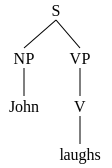

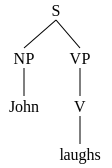

In [8]:
t1 = Tree.fromstring('(S (NP John) (VP (V laughs)))')
t1
t1[0][0].sem = `John.e
t1[1][0].sem = `lambda x=e: LAUGHS(x).t
t1


In [9]:
lexicon = {
  "john"  : `JOHN.e,
  "mary"  : `MARY.e,
  "cat"   : `lambda x=e: CAT(x).t,
  "gray"  : `lambda x=e: GRAY(x).t,
  "runs"  : `lambda x=e: RUN(x).t,
  "loves" : `lambda y=e: (lambda x=e: LOVE(x,y).t),
  "the"   : `lambda f=et: iota(f).e % singular(f),
}

calc = Interpreter(lexicon=lexicon)

In [10]:
# Trace and Pronouns (TP): return the assignment a
@calc.rule()
def TP(*, alpha: str):
  """Trace and Pronouns: return the assignment a."""
  try:
    i = int(alpha.split('_')[1])
    return `g[i].e
  except: pass
  
  return UNDEF

# Predicate Abstraction (PA): bind the assignment a
@calc.rule()
def PA(beta: PhiValue, *, alpha: str):
  """Predicate Abstraction: bind the assignment a."""
  try:
    i = int(alpha[0])
    if beta.stype == Type.t:
      return `lambda x=e: beta(g=g|{i:x}).t
  except: pass
  
  return UNDEF

# Terminal Node (TN): lexical lookup
@calc.rule()
def TN(*, alpha: str):    
  """Terminal Node: lexical lookup of *alpha* (string token)."""
  return calc.lookup(alpha)

# Non-Branching Node (NN): pass child meaning unchanged
@calc.rule()
def NN(beta: PhiValue):
  """Non-branching Node: pass child meaning unchanged."""
  return beta

# Functional Application (FA): apply function to argument
@calc.rule()
def FA(beta: PhiValue, gamma: PhiValue):
  """Functional Application (order determined by `takes`)."""
  if UNDEF in (beta, gamma):
    return UNDEF

  if takes(beta, gamma):
    fn, arg = beta, gamma
  elif takes(gamma, beta):
    fn, arg = gamma, beta
  else:
    return UNDEF

  return `fn(arg) % defined(arg) # Note that if arg fails the fn guard, it will already return UNDEF

# Predicate Modification (PM): conjoin meanings
@calc.rule()
def PM(beta: PhiValue, gamma: PhiValue):
  """Predicate Modification: conjoin meanings."""
  if UNDEF in (beta, gamma):
    return UNDEF
  
  if beta.stype == gamma.stype == Type.et:
    return `lambda x=e: beta(x) and gamma(x) % defined(beta(x)) % defined(gamma(x))

  return UNDEF

RUN(iota(lambda x: CAT(x))) % singular(lambda x: CAT(x))

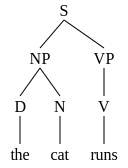

In [11]:
t2 = Tree.fromstring('(S (NP (D the) (N cat)) (VP (V runs)))')
calc.interpret(t2)
t2

In [12]:
`foo({1:MARY.e})

foo({1: MARY})

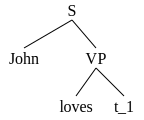

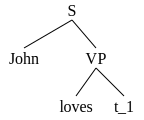

LOVE(JOHN, g[1])

LOVE(JOHN, MARY)

LOVE(JOHN, MARY)

In [13]:
t3 = Tree.fromstring(
'''
(S John
  (VP loves t_1)
)
''')

t3
m3 = calc.interpret(t3)
t3

m3
`m3(g={1:MARY.e})
m3(g=`{1:MARY.e})

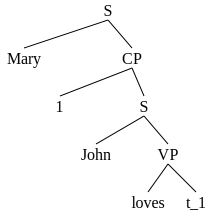

LOVE(JOHN, MARY)

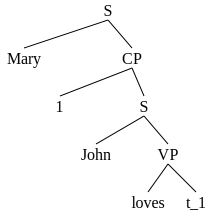

In [14]:
t4 = Tree.fromstring(
'''
(S Mary (CP 1
  (S John
    (VP loves t_1)
  )
))
''')

t4
calc.interpret(t4)
t4